In [1]:
import video.vid as v
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt
from video.conversion import Conversions

In [2]:
reload(v)
path = 'videos/Red Spin.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)

## Testing that outputs are the same as `df`

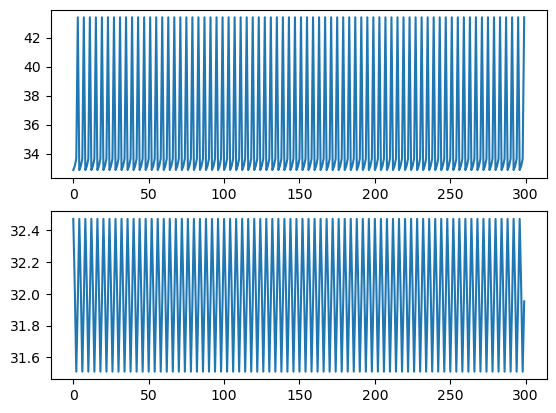

In [3]:
reload(v)
fig, axs = plt.subplots(2,1)
axs[0].plot(vid.value.agg('mean') )
axs[1].plot(vid_df.groupby(level=0).lightness.mean())
plt.show()

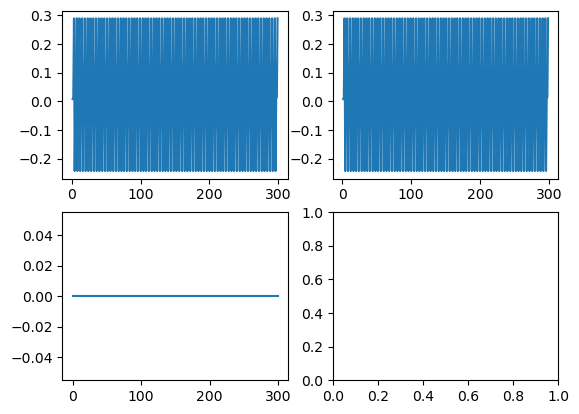

In [4]:
reload(v)

fig, axs = plt.subplots(2,2)
axs[0,0].plot(vid.pct_change(1,'value'))
axs[0][1].plot(vid.value.pct_change(1))
axs[1,0].plot(vid.hue.agg('sum'))

frame  y  x
0      0  0    0
          1    0
          2    0
          3    0
          4    0
Name: masked_values, dtype: uint8

AttributeError: 'Video' object has no attribute '_Video__vid'

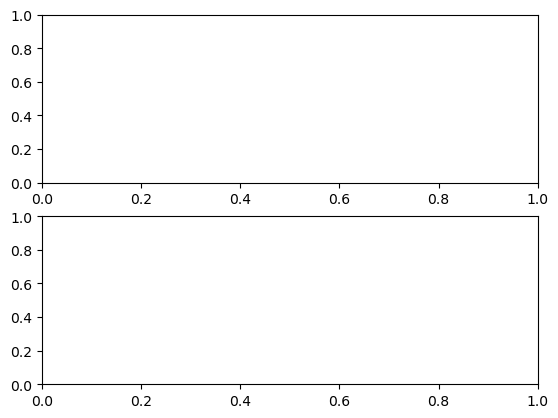

In [7]:
reload(v)
from video.conversion import Conversions
import cv2 as cv
fig, axs = plt.subplots(2,1)
new_vid = v.Video.from_file('videos/Banned Pokemon Seizure Scene.mp4',Conversions.HLS)
masked_vid = new_vid.mask_channel('lightness',160)
vid_df = df.get_exploration_df(new_vid.arr)
axs[0].plot(masked_vid.lightness.agg('mean'))
axs[1].plot(vid_df.groupby(level=0).masked_values.pct_change(1))

In [48]:
df_mean = vid_df.groupby(level=0).lightness.mean()
vid_mean = new_vid.lightness.agg('mean')
df_mean = pd.DataFrame(df_mean)
df_mean['v_lightness'] = vid_mean
df_mean.apply(lambda row: row.lightness != row.v_lightness, axis=1).sum()

0

In [54]:
df_sum = vid_df.groupby(level=0).lightness.sum()
vid_sum = new_vid.lightness.agg('sum')
df_sum = pd.DataFrame(df_sum)
df_sum['v_lightness'] = vid_sum
df_sum.apply(lambda row: row.lightness != row.v_lightness, axis=1).sum()

0

In [52]:
df_pct = vid_df.groupby(level=0).lightness.mean()
vid_pct = new_vid.